# SHO Fitting

This notebook completes the SHO fitting using the conventional algorithms in Pycroscopy. 

## Import Packages

In [1]:
# # For the notebook to work you must have m3_learning installed
# # pip install m3_learning
%load_ext autoreload
%autoreload 2

from m3util.viz.printing import printer
from m3util.viz.style import set_style
from m3util.ml.rand import set_seeds
from m3util.util.IO import download_and_unzip
from belearn.dataset.dataset import BE_Dataset
from belearn.viz.viz import Viz

import numpy as np

# from m3_learning.be.dataset import BE_Dataset
printing = printer(basepath = './Figures/')

set_style("printing")
set_seeds(seed=42)

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42


2024-09-13 11:29:17.928809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-13 11:29:18.020809: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-13 11:29:18.047733: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-13 11:29:18.216285: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-13 11:29:19.100052: W tensorflow/compiler/tf2

tensorflow seed was set to 42


## Loading data for SHO fitting


In [4]:
# Download the data file from Zenodo
url = 'https://zenodo.org/record/7774788/files/PZT_2080_raw_data.h5?download=1'

# Specify the filename and the path to save the file
# filename = 'data_raw.h5'
filename = '1_data_raw.h5'
save_path = './Data'

# download the file
download_and_unzip(filename, url, save_path)

Using files already downloaded


In [5]:
data_path = save_path + '/' + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path)

# print the contents of the file
dataset.print_be_tree()

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
Datasets and datagroups within the file:
------------------------------------
/
/Measurement_000
/Measurement_000/Channel_000
/Measurement_000/Channel_000/Bin_FFT
/Measurement_000/Chann

## Visualize Raw Data

### Raw Cantilever Response


In [4]:
# insatiate the visualization object
image_scalebar = [2000, 500, "nm", "br"]

BE_viz = Viz(dataset, printing, verbose=True, 
             SHO_ranges = [(0,1.5e-4), (1.31e6, 1.33e6), (-300, 300), (-np.pi, np.pi)], 
             image_scalebar = image_scalebar)

True 


        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        Fitter = LSQF
        Scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = None
        NN Phase Shift = None
        Noise Level = 0
        Loop Interpolated = False
        
./Figures/Figure_1_raw_cantilever_response.png
./Figures/Figure_1_raw_cantilever_response.svg


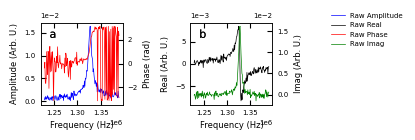

In [5]:
prediction = {"resampled": False,
              "label": "Raw"}

BE_viz.raw_data_comparison(prediction, filename="Figure_1_raw_cantilever_response")

**Figure 2.1** Raw cantilever response. a) magnitude spectrum and Phase, b) real and imaginary parts of the complex spectrum.


### Band-Excitation Experiments

/home/ferroelectric/.pyenv/versions/3.8.0/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


./Figures/Figure_2_raw_be_experiment.png
./Figures/Figure_2_raw_be_experiment.svg


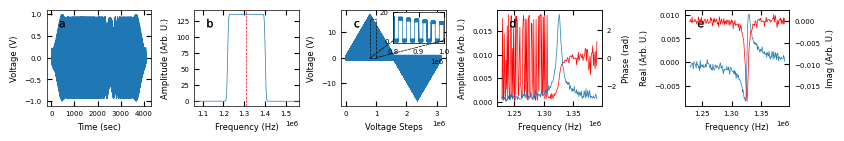

In [6]:
BE_viz.raw_be(dataset, filename="Figure_2_raw_be_experiment")

**Figure 2.1** Band-Excitation Experiments. a) raw drive amplitude applied to the tip, b) energy of the waveform in the frequency domain, c) DC voltage applied to switch the sample, inset shows a zoomed in view of the switching waveform where measurements are made in the on and off state. d) raw cantilever response magnitude and phase, e) real and imaginary parts of the complex spectrum.

## SHO Fitting
**Note**: this code takes around 15 minutes to execute

If you downloaded the SHO fit data, or ran notebook 1 you do not need to fit the data again. 

You can skip to the next section.

If you would like to run this code block please change the Fit_SHO flag to `True`

In [7]:
Fit_SHO = False

if Fit_SHO: 

    # # computes the SHO fit for the data in the file
    dataset.SHO_Fitter(force = True)
    
    # instantiate the dataset object
    # good to reinstantiate the dataset object after fitting
    dataset = BE_Dataset(data_path)

### Views the Distribution of the Least Squares Fitting (LSQF) results

It is good to view the distributions and standardize the phase shift. The phase shift is rotated around the unit circle such that the peaks are at $-\pi/2$ and $\pi/2$

current_SHO_ranges: [(0, 0.00015), (1310000.0, 1330000.0), (-300, 300), (-3.141592653589793, 3.141592653589793)]
current_dataset_state: {'raw_format': 'complex', 'fitter': 'LSQF', 'scaled': False, 'output_shape': 'pixels', 'measurement_state': 'all', 'LSQF_phase_shift': 0, 'NN_phase_shift': None, 'noise': 0, 'loop_interpolated': False}

        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        Fitter = LSQF
        Scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = 0
        NN Phase Shift = None
        Noise Level = 0
        Loop Interpolated = False
        
./Figures/Figure_3_Original_LSQF_Histograms.png
./Figures/Figure_3_Original_LSQF_Histograms.svg


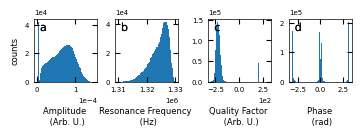

In [8]:
dataset.LSQF_phase_shift = 0

BE_viz.SHO_hist(dataset.SHO_fit_results(),
                      filename="Figure_3_Original_LSQF_Histograms")


**Figure 3.** Distribution of the Least Squares Fitting (LSQF) results of the unmodified data. a) Distribution of the amplitude, b) Distribution of the resonance frequency, c) distribution of the quality factor, d) distribution of the resonance frequency.

current_SHO_ranges: [(0, 0.00015), (1310000.0, 1330000.0), (-300, 300), (-3.141592653589793, 3.141592653589793)]
current_dataset_state: {'raw_format': 'complex', 'fitter': 'LSQF', 'scaled': False, 'output_shape': 'pixels', 'measurement_state': 'all', 'LSQF_phase_shift': 1.5707963267948966, 'NN_phase_shift': None, 'noise': 0, 'loop_interpolated': False}

        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        Fitter = LSQF
        Scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = 1.5707963267948966
        NN Phase Shift = None
        Noise Level = 0
        Loop Interpolated = False
        
./Figures/Figure_4_Phase_Shifted_LSQF_Histograms.png
./Figures/Figure_4_Phase_Shifted_LSQF_Histograms.svg


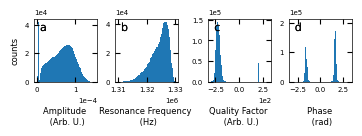

In [9]:
dataset.LSQF_phase_shift = np.pi/2

BE_viz.SHO_hist(dataset.SHO_fit_results(),
                      filename="Figure_4_Phase_Shifted_LSQF_Histograms")

**Figure 4.** Distribution of the Least Squares Fitting (LSQF) results of the normalized data. a) Distribution of the amplitude, b) distribution of the resonance frequency, c) distribution of the quality factor, d) distribution of the resonance frequency.

### Plots the SHO Fit Results


        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        Fitter = LSQF
        Scaled = False
        Output Shape = pixels
        Measurement State = on
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = 1.5707963267948966
        NN Phase Shift = None
        Noise Level = 0
        Loop Interpolated = False
        
./Figures/Figure_5_Single_Pixel_Loops.png
./Figures/Figure_5_Single_Pixel_Loops.svg


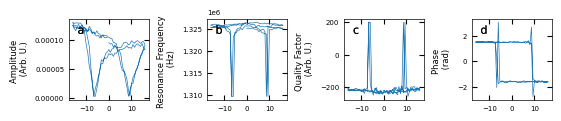

In [10]:
BE_viz.dataset.measurement_state = 'on'

BE_viz.SHO_loops(filename="Figure_5_Single_Pixel_Loops")

**Figure 5.** Example switching loops obtained for the amplitude, resonance frequency, quality factor, and phase.

## SHO Switching Movies

In [13]:
BE_viz.SHO_fit_movie_images(noise = 0, 
                            scalebar_= True, 
                            basepath = "Movies/SHO_LSQF_",  
                            filename="SHO_LSQF",
                            phase_shift = [np.pi/2])

Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0000.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0001.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0002.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0003.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0004.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0005.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0006.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0007.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0008.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0009.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0010.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0011.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0012.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0013.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0014.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0015.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0016.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0017.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0018.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0019.png


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 192/192 [00:25<00:00,  7.38it/s]
